In [14]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import copy

# make sure the 'code' dir is on your path (change this):
codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

from plotting import plot_utils, summary_plots, load_fits, plot_prf_params
plot_utils.set_all_font_sizes(12)
from utils import roi_utils, default_paths
from utils import prf_utils


In [15]:
subjects = np.arange(1,9)
n_subjects = len(subjects)

fitting_type = 'alexnet_all_conv_pca'

out = [load_fits.load_fit_results(subject=ss, fitting_type=fitting_type, \
                                  n_from_end=0, verbose=False, return_filename=False) \
       for ss in subjects]

#### Voxel grouping "ROI" definitions are based on semantic selectivity

In [16]:
from analyze_fits import sem_voxel_groups
sem_groups, sem_group_names = sem_voxel_groups.get_sem_voxel_groups()
n_sem_groups = len(sem_group_names)

In [18]:
[np.sum(sem_groups[si], axis=0) for si in range(n_subjects)]

[array([500, 500, 500, 500, 500, 500, 500, 500]),
 array([500, 500, 500, 500, 500, 500, 500, 500]),
 array([500, 500, 500, 500, 500, 500, 500, 500]),
 array([500, 500, 500, 500, 500, 500, 500, 500]),
 array([500, 500, 500, 500, 500, 500, 500, 500]),
 array([500, 500, 500, 500, 500, 500, 500, 500]),
 array([500, 500, 500, 500, 500, 500, 500, 500]),
 array([500, 500, 500, 500, 500, 500, 500, 500])]

In [19]:
# pull out the pRF params

prf_pars = np.concatenate([out[si]['best_params'][0][:,0,:] for si in range(n_subjects)], axis=0)
x = prf_pars[:,0]
y = prf_pars[:,1]

screen_eccen_deg = 8.4
angle_fwrf, eccen_fwrf = prf_utils.cart_to_pol(x*screen_eccen_deg,y*screen_eccen_deg)
sigma = prf_pars[:,2]
size_fwrf = np.round(sigma * screen_eccen_deg, 2)
angle_fwrf = np.round(angle_fwrf,2)
eccen_fwrf = np.round(eccen_fwrf,2)

x_fwrf, y_fwrf = x*screen_eccen_deg, y*screen_eccen_deg

In [20]:
size_bins = np.linspace(0.10, 8.5, 10)
eccen_bins = np.linspace(0, 7.1, 10)
x_bins = np.linspace(-7.1, 7.1, 10); 
y_bins = np.linspace(-7.1, 7.1, 10)

#### Creating histograms of each parameter

In [21]:
hist_values = [np.zeros((n_sem_groups, len(bins)-1)) for bins in [size_bins, eccen_bins, y_bins, x_bins]]
n_par_types = 4;

bin_centers_eachpar = [[] for par in range(n_par_types)]

for rr in range(n_sem_groups):
    
    inds = np.concatenate(sem_groups, axis=0)[:,rr]
    
    bi = -1
    for bins, par_vals in zip([size_bins, eccen_bins, y_bins, x_bins], \
                              [size_fwrf, eccen_fwrf, y_fwrf, x_fwrf]):
        bi+=1
        counts, bin_edges = np.histogram(par_vals[inds], bins=bins)
        
        hist_values[bi][rr,:] = counts/np.sum(counts)
        
        bin_width = (bin_edges[1]-bin_edges[0])
        bin_centers = bins[0:-1]+bin_width/2
        
        bin_centers_eachpar[bi] = bin_centers
        

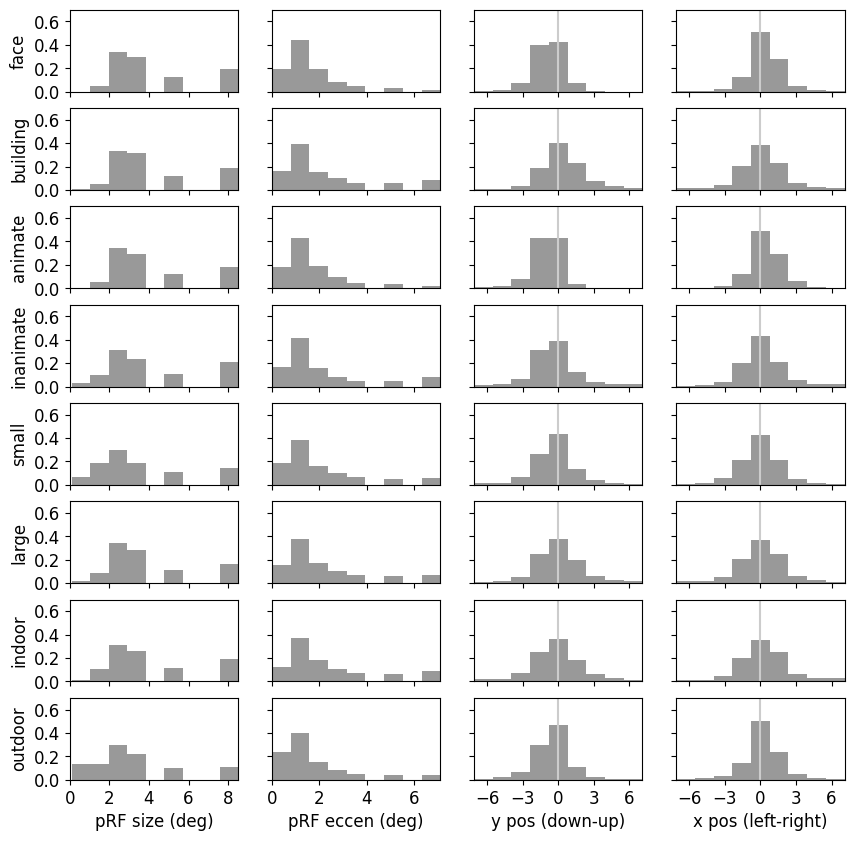

In [26]:
plot_utils.set_all_font_sizes(12)
plt.rcParams['pdf.fonttype']=42

colors = np.tile(np.array([[0.6, 0.6, 0.6,1]]), [n_sem_groups,1])

ylims = [0, 0.70]
yticks = [0, 0.2, 0.4, 0.6]

ylims_diff = [-0.2, 0.2]
yticks_diff = [-0.2, 0, 0.2]

xticks = [[0,2,4,6,8], [0,2,4,6], [-6, -3, 0, 3, 6], [-6, -3, 0, 3, 6]]
xlims = [[0,8.5],[0,7.1],[-7.1,7.1],[-7.1,7.1]]

par_names = ['pRF size (deg)', 'pRF eccen (deg)', 'y pos (down-up)', 'x pos (left-right)']

npx = n_sem_groups

plt.figure(figsize=(10,10));

pi=0;

for rr in range(n_sem_groups):

    for par in range(n_par_types):

        bar_centers = bin_centers_eachpar[par]

        bar_heights = hist_values[par][rr,:]
        
        name = sem_group_names[rr]

        pi+=1
        plt.subplot(npx,4,pi)

        bin_width = bar_centers[1] - bar_centers[0]
        plt.bar(bar_centers, bar_heights, width=bin_width, facecolor=[0.6,0.6,0.6,1])

        plt.xlim(xlims[par])
        if rr==(npx-1):
            plt.xlabel(par_names[par])
            plt.xticks(xticks[par])
        else:
            plt.xticks(xticks[par], labels=[])

        plt.ylim(ylims)
            
        if par==0:
            plt.ylabel(name)
            plt.yticks(yticks)
        else:
            plt.yticks(yticks,[])

        if par>1:
            plt.axvline(0, color=[0.8, 0.8, 0.8, 1])

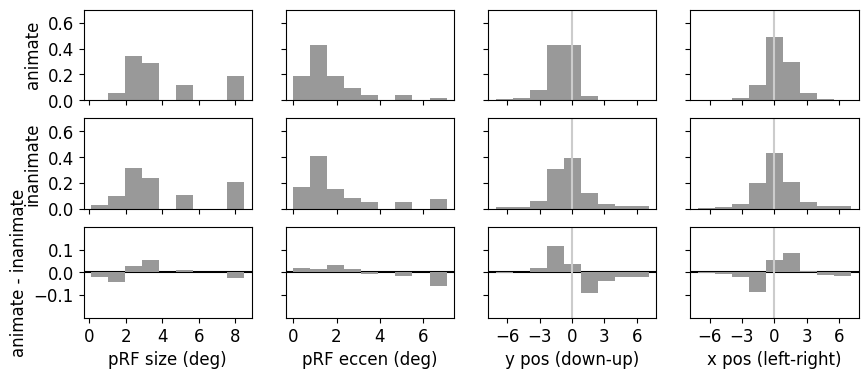

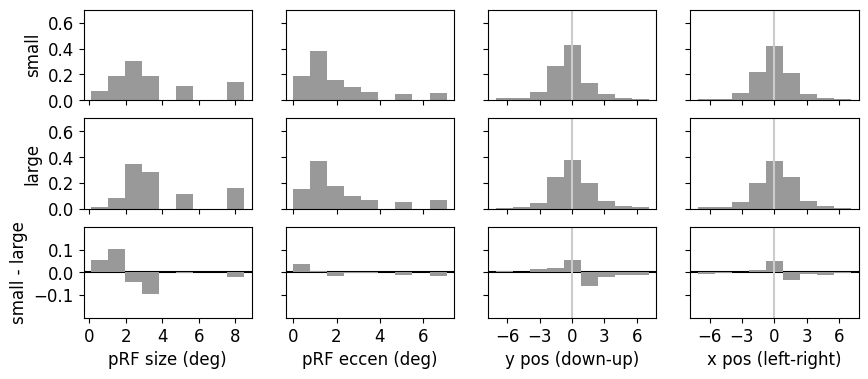

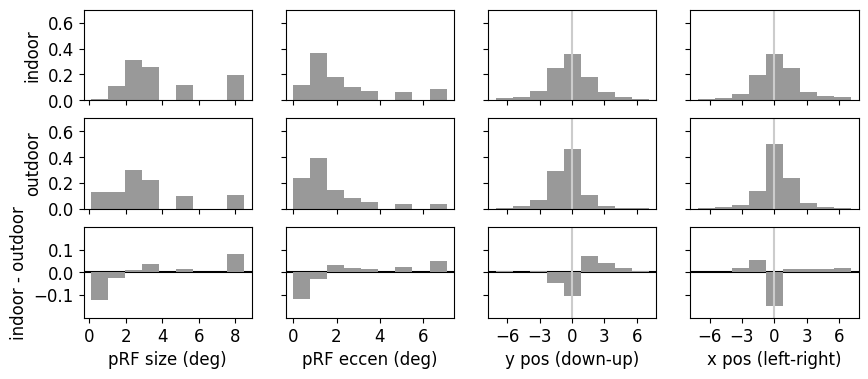

In [34]:
plot_utils.set_all_font_sizes(12)
plt.rcParams['pdf.fonttype']=42

colors = np.tile(np.array([[0.6, 0.6, 0.6,1]]), [n_sem_groups,1])

n_bins=10
linear_bins=False

ylims = [0, 0.70]
yticks = [0, 0.2, 0.4, 0.6]

ylims_diff = [-0.2, 0.2]
yticks_diff = [-0.1, 0, 0.1]

xticks = [[0,2,4,6,8], [0,2,4,6], [-6, -3, 0, 3, 6], [-6, -3, 0, 3, 6]]
xlims = [[0,8.5],[0,7.1],[-7.1,7.1],[-7.1,7.1]]

par_names = ['pRF size (deg)', 'pRF eccen (deg)', 'y pos (down-up)', 'x pos (left-right)']

# pairs = [[0,1],[2,3],[4,5],[6,7]]
pairs = [[2,3],[4,5],[6,7]]

npx = 3

for pair_ind in range(len(pairs)):
    
    plt.figure(figsize=(10,4));

    pair = pairs[pair_ind]

    pi=0;

    for rr in (pair+[-1]):
        
        for par in range(n_par_types):
            
            bar_centers = bin_centers_eachpar[par]

            if rr==-1:
                bar_heights = hist_values[par][pair[0],:] - hist_values[par][pair[1],:]
                name = '%s - %s'%(sem_group_names[pair[0]], sem_group_names[pair[1]])
            else:

                bar_heights = hist_values[par][rr,:]
                name = sem_group_names[rr]

            pi+=1
            plt.subplot(npx,4,pi)

            bin_width = bar_centers[1] - bar_centers[0]
            plt.bar(bar_centers, bar_heights, width=bin_width,facecolor=[0.6,0.6,0.6,1])

            # plt.xlim(xlims[par])
            if (rr==-1):
                plt.xlabel(par_names[par])
                plt.xticks(xticks[par])
            else:
                plt.xticks(xticks[par], labels=[])
                
            if par==0:
                plt.ylabel(name) 
                if rr==-1:
                    plt.yticks(yticks_diff)
                else:
                    plt.yticks(yticks)
            else:
                if rr==-1:
                    plt.yticks(yticks_diff,[])
                else:
                    plt.yticks(yticks,[])

                    
            if rr==-1:
                plt.ylim(ylims_diff)
                plt.axhline(0, color='k', zorder=-10)
            else:
                plt.ylim(ylims)
                

            if par>1:
                plt.axvline(0, color=[0.8, 0.8, 0.8, 1])
                